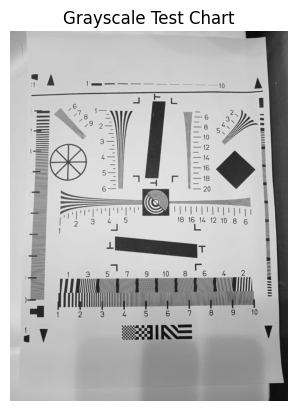

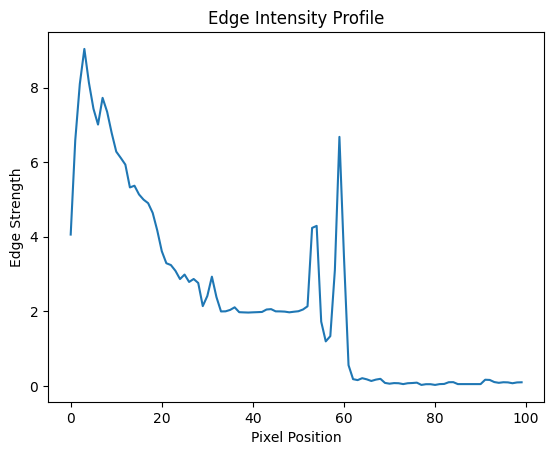

Estimated resolution: 0.80 line pairs per mm


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity

# Load the image (replace with your image path or URL)
image = io.imread('imagen1.jpg')
gray = color.rgb2gray(image)

# Display the image
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Test Chart")
plt.axis('off')
plt.show()

# Crop a region with fine lines (adjust these values)
y1, y2 = 300, 400
x1, x2 = 500, 600
region = gray[y1:y2, x1:x2]

# Apply Sobel filter to detect edges
edges = filters.sobel(region)

# Sum pixel intensities along rows to get line frequency
profile = np.sum(edges, axis=0)

# Plot intensity profile
plt.plot(profile)
plt.title("Edge Intensity Profile")
plt.xlabel("Pixel Position")
plt.ylabel("Edge Strength")
plt.show()

# Estimate number of line pairs
# Count peaks in the profile (each peak = one line)
from scipy.signal import find_peaks

peaks, _ = find_peaks(profile, height=0.05, distance=2)
num_line_pairs = len(peaks) // 2  # Each pair = one line pair

# Calculate lp/mm
# Assume physical width of cropped region is known (e.g., 10 mm)
physical_width_mm = 10  # Adjust based on your chart
lp_per_mm = num_line_pairs / physical_width_mm

print(f"Estimated resolution: {lp_per_mm:.2f} line pairs per mm")
